In [202]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

# import bayesian estimation package
import ndim_homogeneous_distinguishability as hd

Let's pack all the functions used to generate figures up towards the top, so we can easily scroll from figure to figure witho

In [208]:
def plot_2D_ex_traj(D, c):
    df = hd.simulate_diffusion_df(n_dim = 2, d_const = D, n_steps = 100, dt = 1, loc_std = 0.03)
    if c==1:
        c1 = palette[0]
        c2 = palette[1]
    else:
        c1 = palette[2]
        c2 = palette[3]
    plt.plot([x[0] for x in df['x']], [x[1] for x in df['x']], label='True', color=c1)
    plt.plot([x[0] for x in df['x']], [x[1] for x in df['x_obs']], label='Observed', color=c2);
    plt.xlabel(r'x ($\mu$m)')
    plt.ylabel(r'y ($\mu$m)')
    plt.legend();
    return df

In [214]:
def draw_all_posteriors(df1, df2, D1, D2):
    
    posterior1t,_a,_b = hd.estimate_diffusion(n_dim = 2, dt = 1, dr = df1['dr'])
    posterior1o,_a,_b = hd.estimate_diffusion(n_dim = 2, dt = 1, dr = df1['dr_obs'])
    posterior2t,_a,_b = hd.estimate_diffusion(n_dim = 2, dt = 1, dr = df2['dr'])
    posterior2o,_a,_b = hd.estimate_diffusion(n_dim = 2, dt = 1, dr = df2['dr_obs'])
    
    xx = np.linspace(D1-6*posterior1o.std(),D2+6*posterior2o.std(), 50)
    
    plt.plot(xx, posterior1t.pdf(xx), color = palette[0], label = 'D1 True')
    plt.plot(xx, posterior1o.pdf(xx), color = palette[1], label='D1 Observed')
    plt.plot(xx, posterior2t.pdf(xx), color = palette[2], label='D2 True')
    plt.plot(xx, posterior2o.pdf(xx), color = palette[3], label='D2 Observed')
    plt.axvline(x=D1, linestyle=':', color='gray')
    plt.axvline(x=D2, linestyle=':', color='gray')
    plt.legend()
    plt.xlabel('Diffusion Constant')
    plt.ylabel('Probability density');

In [215]:
def simulate_diffusion_error(n_dim, d_const, n_steps, dt, err_list):
    
    df = pd.DataFrame()
    np.random.seed()

    # initialize position at origin
    x0 = list(np.zeros(n_dim))
    x = x0
    x_list = [x]
    for t in range(n_steps-1):
        dx = [np.sqrt(2*d_const*dt)*np.random.randn() for _dim in range(n_dim)]
        x_new = [sum(i) for i in zip(x, dx)]
        x_list.append(x_new)
        x = x_new
    df['0'] = x_list
    
    for err in err_list:
        xo_list = []
        for t in range(n_steps):
            x_obs = [x_list[t][i] + err*np.random.randn() for i in range(n_dim)]
            xo_list.append(x_obs)
        df[str(err)] = xo_list
        
    plt.plot([x[0] for x in df['0']], [x[1] for x in df['0']], label='0', color='gray', marker='o')
    for err in err_list:
        plt.plot([x[0] for x in df[str(err)]], [x[1] for x in df[str(err)]], label=str(err))
        for t in range(n_steps)
            circle1 = plt.Circle((x_list[t][0], x_list[t][1]), err, )
    plt.xlabel(r'x ($\mu$m)')
    plt.ylabel(r'y ($\mu$m)')
    plt.legend();
        
    return df

First we deomonstrate a diffusive trajectory with varying levels of localization error

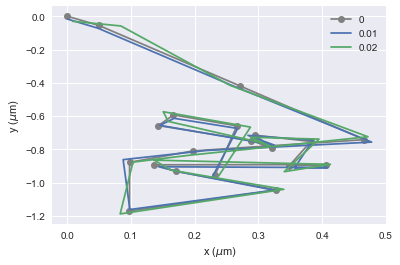

In [220]:
err_list = [0.01, 0.02]
df = simulate_diffusion_error(2, D1, 20, 1, err_list)

We can then select a localization error level and show two trajectories with the same localization error but different diffusion constants

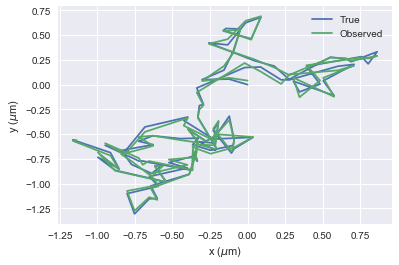

In [221]:
D1 = 0.01
df1 = plot_2D_ex_traj(D1, 1)

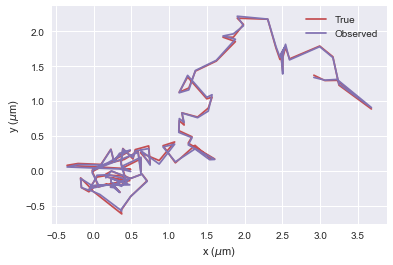

In [222]:
D2 = 1.5*D1
df2 = plot_2D_ex_traj(D2, 2)

We can show the differences in posterior for both (1) the same diffusion constant with and without error and (2) the same for a differing diffusion constant. This opens us up to talk about eithor error in the posterior due to localization error and trajectory length (first) or posterior overlap and distinguishability (second). 

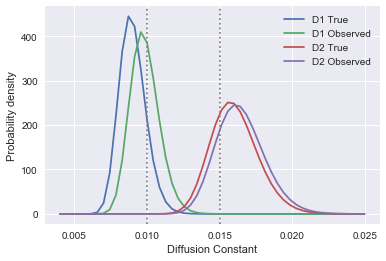

In [223]:
draw_all_posteriors(df1, df2, D1, D2)

For either the first or the second of these options, heatmaps serving as potential figure mockups are located in the tutorial notebook.